In [3]:
import pandas as pd
import numpy as np


In [4]:
from datetime import datetime
#easy way to create dat time
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [5]:
#using "dateutils" module:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [6]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',data_source='google')
goog.head()

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [8]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

NameError: name 'goog' is not defined

In [16]:
data = pd.read_csv('../Datasets/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-02-28 23:00:00,5.0,6.0
2019-02-28 22:00:00,4.0,27.0
2019-02-28 21:00:00,16.0,32.0
2019-02-28 20:00:00,16.0,50.0
2019-02-28 19:00:00,39.0,59.0


In [17]:
data.shape

(56160, 2)

In [18]:
data.columns = ['West', 'East'] #change column names into "West" and "East" for simplicity
data['Total'] = data.eval('West + East')
data.head()

,West,East,Total
Date,,,
2019-02-28 23:00:00,5.0,6.0,11.0
2019-02-28 22:00:00,4.0,27.0,31.0
2019-02-28 21:00:00,16.0,32.0,48.0
2019-02-28 20:00:00,16.0,50.0,66.0
2019-02-28 19:00:00,39.0,59.0,98.0


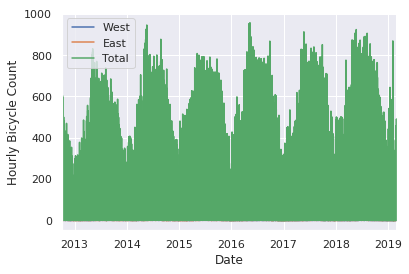

In [19]:
#visualization:
%matplotlib inline
import seaborn; seaborn.set()

data.plot()
plt.ylabel('Hourly Bicycle Count');

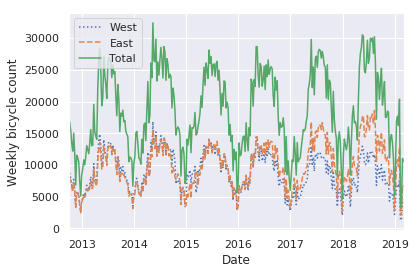

In [20]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

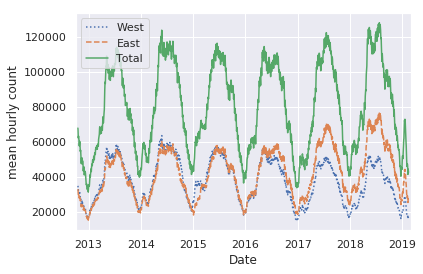

In [22]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-']) #mean over a window of size 30
plt.ylabel('mean hourly count');

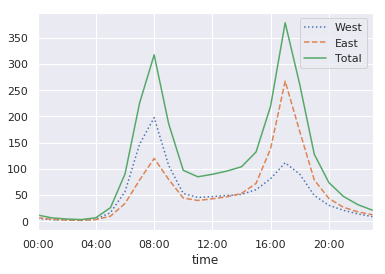

In [23]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

In [24]:
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

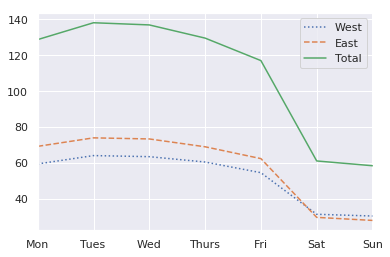

In [25]:
#how things change based on the day of the week
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

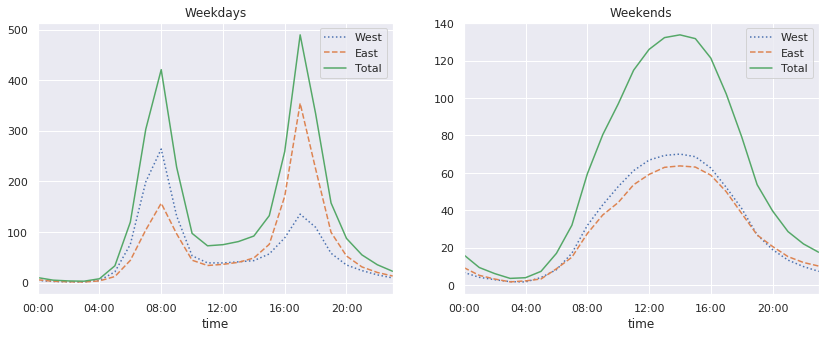

In [27]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5)) #two subplots
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',xticks=hourly_ticks, style=[':', '--', '-'])